##Import Library

In [1]:
import numpy as np
np.random.seed(10)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Upload, Read, & Select Column Dataset



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# load and read data

df = pd.read_excel("gdrive/MyDrive/Aplikasi Pembelajaran Mesin/Pertemuan 7/Dataset/covid.xlsx")
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#selecting cols
data = df[["Monocytes", "Eosinophils", "Mean platelet volume ", "Platelets", "Hemoglobin", "Leukocytes", "Red blood Cells", "SARS-Cov-2 exam result"]]
data.head()

,Monocytes,Eosinophils,Mean platelet volume,Platelets,Hemoglobin,Leukocytes,Red blood Cells,SARS-Cov-2 exam result
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
1,0.357547,1.482158,0.010677,-0.517413,-0.02234,-0.09461,0.102004,negative
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative


## Handling missing value

In [6]:
#check data missing
data.isnull().sum() 

Monocytes                 5043
Eosinophils               5042
Mean platelet volume      5045
Platelets                 5042
Hemoglobin                5041
Leukocytes                5042
Red blood Cells           5042
SARS-Cov-2 exam result       0
dtype: int64

In [7]:
#handling missing value
 
data = data.dropna() #drop data missing
data.isna().sum() #check sum of data missing

Monocytes                 0
Eosinophils               0
Mean platelet volume      0
Platelets                 0
Hemoglobin                0
Leukocytes                0
Red blood Cells           0
SARS-Cov-2 exam result    0
dtype: int64

## Encode Data Dependent

In [8]:
#encode data SARS-Cov-2 exam result from string to int
dict_examr = {
    'negative' : 0,
    'positive' : 1
}

# We apply the dictionary using a lambda function and the pandas .apply() module
data['SARS-Cov-2 exam result'] = data['SARS-Cov-2 exam result'].apply(lambda x : dict_examr[x])

data.head()

,Monocytes,Eosinophils,Mean platelet volume,Platelets,Hemoglobin,Leukocytes,Red blood Cells,SARS-Cov-2 exam result
1,0.357547,1.482158,0.010677,-0.517413,-0.022340,-0.094610,0.102004,0
8,0.068652,1.018625,-1.672222,1.429667,-0.774212,0.364550,-0.850035,0
15,1.276759,-0.666950,-0.213711,-0.429480,-0.586244,-0.884923,-1.361315,0
18,-0.220244,-0.709090,-0.550290,0.072992,0.792188,-0.211488,0.542763,0
22,2.012129,-0.709090,1.020415,-0.668155,-0.147652,-1.132592,-0.127191,0


## Set Data Dependent and Data Independent

In [9]:
# set variabel dependen dan independen
x = data.drop(["SARS-Cov-2 exam result"], axis=1).to_numpy()
y = data['SARS-Cov-2 exam result'].to_numpy()

## Normalisasi Data Independent

In [10]:
#make standardization object

sc = StandardScaler()
sc.fit_transform(x)

array([[ 0.362236  ,  1.47532383,  0.01068549, ..., -0.02796373,
        -0.10133697,  0.11290921],
       [ 0.07253539,  1.01268952, -1.67080768, ..., -0.77952203,
         0.35806654, -0.85165827],
       [ 1.28401107, -0.66961711, -0.21351445, ..., -0.59163225,
        -0.89206751, -1.36966666],
       ...,
       [ 0.91530116, -0.71167474, -0.21351445, ...,  1.09937396,
        -0.55795605,  0.63091765],
       [ 1.38935692, -0.58550177, -0.5498122 , ..., -2.78367763,
        -1.74126773, -3.352389  ],
       [ 0.57292753, -0.83784777, -0.32561334, ...,  0.5357054 ,
        -1.2957857 ,  0.59519296]])

## Split Dataset

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 478
Test records: 120


## Activator Function

In [12]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

## Modelling Data

### Training

In [13]:
#define the training as a fucntion

#membuat fungsi ANN_train untuk model data training dengan parameter nilai x_train, y_train, dan nilai default jmlh perceptron layer 1, jmlh perceptron layer 2, dan learning rate
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):
    
    # 0: Inisialisasi data relevan angka random
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    # Lakukan perulangan untuk semua baris data, i.e. over I.
    for I in range(0, X_train.shape[0]-1): #perulangan ke semua baris data:
    
        # 1: input data 
        x = X_train[I]
    
        # 2: Mulai algorithm
    
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
    
        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # 2nd Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # 1st Layer Error
    
        # 3: Gradient descent 
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out
    
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2
    
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1
    
        # 4. Komputasi loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
    
    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 40):
            loss_avg+=vec_y[30*i+m]/40
        batch_loss.append(loss_avg)
    
    
    plt.figure(figsize=(10,6)) #membuat ukuran figure diagram
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error') #membuat scatter plot
    plt.title('Averege Loss by epoch', fontsize=20) #menentukan title dan ukuran font scatter diagram 
    plt.xlabel('Epoch', fontsize=16) #menentukan xlabel dan ukuran font scatter diagram 
    plt.ylabel('Loss', fontsize=16) #menentukan ylabel dan ukuran font scatter diagram 
    plt.show() #tampilkan diagram
    
    #kembalikan nilai berikut
    return w1, b1, w2, b2, wOut, bOut, mu

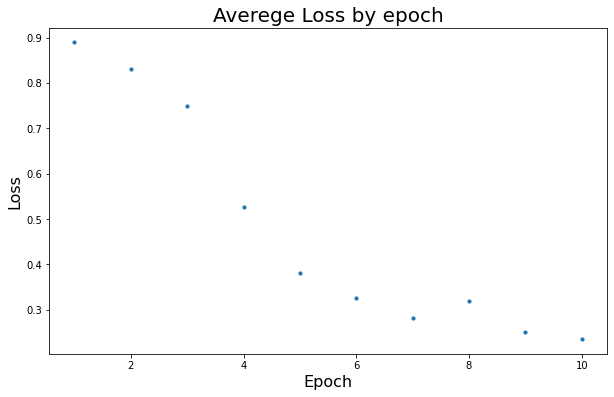

In [14]:
# call function

#memanggil function ANN_train dengan parameter yang diminta fungsi tersebut.
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train, Y_train, p=7, q=4, eta=0.0030)

### Test Prediction

In [15]:
#define model as test function(prediction)
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    
    return np.array(pred);

In [16]:
#call function predictions
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)

### Result

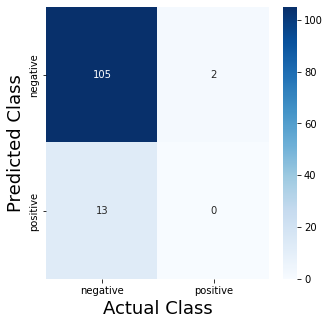

In [17]:
dict_hasil={
    0:'negative',
    1:'positive'
}

cm = confusion_matrix(Y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_hasil[i] for i in range(0,2)], columns = [dict_hasil[i] for i in range(0,2)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.ylabel("Predicted Class", fontsize=18)
plt.xlabel("Actual Class", fontsize=18)
plt.show()

In [18]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       107
           1       0.00      0.00      0.00        13

    accuracy                           0.88       120
   macro avg       0.44      0.49      0.47       120
weighted avg       0.79      0.88      0.83       120

